In [55]:
# 大小盘轮动
import pandas as pd
import matplotlib.pyplot as plt
import akshare as ak
import datetime
import glob

In [85]:
sh50_files = sorted(glob.glob("../sh_index_data_tdq/sh510050_*.tsv"))
sh1000_files =sorted( glob.glob("../sh_index_data_tdq/sh512100_*.tsv"))
sh50_files

['../sh_index_data_tdq/sh510050_2023-03-17.tsv']

In [115]:
sh50_pd = pd.read_table(sh50_files[0], header=0, index_col=0,parse_dates=["day"])
# for f in sh50_files[1:]:
#     add_pd = pd.read_table(f, header=0, index_col=0,parse_dates=["day"])
#     add_pd = add_pd[add_pd["day"] > list(sh50_pd["day"])[-1]] 
#     sh50_pd = sh50_pd.append(add_pd)
    
sh1000_pd = pd.read_table(sh1000_files[0], header=0, index_col=0,parse_dates=["day"])
# for f in sh1000_files[1:]:
#     add_pd = pd.read_table(f, header=0, index_col=0,parse_dates=["day"])
#     add_pd = add_pd[add_pd["day"] > list(sh1000_pd["day"])[-1]] 
#     sh1000_pd = sh1000_pd.append(add_pd)
    
sh50_pd.reset_index(drop=True, inplace=True)
sh1000_pd.reset_index(drop=True, inplace=True)
sh50_pd

,open,close,high,low,vol,amount,year,month,day,hour,minute,datetime
0,3.539,3.556,3.564,3.539,35481200.0,126032232.0,2021,3,11,9,35,2021-03-11 09:35
1,3.556,3.551,3.566,3.546,22699100.0,80798040.0,2021,3,11,9,40,2021-03-11 09:40
2,3.553,3.567,3.571,3.553,20905000.0,74504384.0,2021,3,11,9,45,2021-03-11 09:45
3,3.567,3.590,3.591,3.566,34468600.0,123415776.0,2021,3,11,9,50,2021-03-11 09:50
4,3.592,3.594,3.599,3.591,31407400.0,112923328.0,2021,3,11,9,55,2021-03-11 09:55
...,...,...,...,...,...,...,...,...,...,...,...,...
23563,2.630,2.632,2.632,2.626,16558900.0,43544520.0,2023,3,17,14,40,2023-03-17 14:40
23564,2.632,2.632,2.634,2.631,12506800.0,32918140.0,2023,3,17,14,45,2023-03-17 14:45
23565,2.633,2.635,2.636,2.632,10827300.0,28514916.0,2023,3,17,14,50,2023-03-17 14:50
23566,2.635,2.638,2.638,2.634,17295600.0,45572832.0,2023,3,17,14,55,2023-03-17 14:55


In [116]:
sh50_pd = sh50_pd[sh50_pd["datetime"].map(str) > "2021-03-28"]
sh1000_pd.loc[sh1000_pd["datetime"].map(str) <"2022-09-05", "close"] *= 2.6895
sh1000_pd = sh1000_pd[sh1000_pd["datetime"].map(str) > "2021-03-28"]

In [117]:
sh1000_pd

,open,close,high,low,vol,amount,year,month,day,hour,minute,datetime
672,0.888,2.407102,0.898,0.888,7538200.0,6750516.0,2021,3,29,9,35,2021-03-29 09:35
673,0.895,2.404413,0.897,0.894,3305500.0,2959067.0,2021,3,29,9,40,2021-03-29 09:40
674,0.893,2.412481,0.897,0.893,3587700.0,3211731.0,2021,3,29,9,45,2021-03-29 09:45
675,0.896,2.417860,0.899,0.896,2538000.0,2279011.0,2021,3,29,9,50,2021-03-29 09:50
676,0.899,2.415171,0.899,0.898,3554200.0,3193415.0,2021,3,29,9,55,2021-03-29 09:55
...,...,...,...,...,...,...,...,...,...,...,...,...
23659,2.683,2.684000,2.685,2.680,10195500.0,27356608.0,2023,3,17,14,40,2023-03-17 14:40
23660,2.684,2.686000,2.686,2.682,4725900.0,12683649.0,2023,3,17,14,45,2023-03-17 14:45
23661,2.686,2.687000,2.688,2.686,2579000.0,6929496.0,2023,3,17,14,50,2023-03-17 14:50
23662,2.688,2.690000,2.690,2.686,4937700.0,13274652.0,2023,3,17,14,55,2023-03-17 14:55


In [118]:
min1_df = sh50_pd[["datetime", "close", "vol"]]
min2_df = sh1000_pd[["datetime", "close", "vol"]]
min1_df.rename(columns={"datetime": "date", "close": "big_close", "vol": "big_vol"}, inplace=True)
min2_df.rename(columns={"datetime": "date", "close": "small_close", "vol": "small_vol"}, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [104]:
min2_df

,date,small_close,small_vol
0,2021/3/9 9:35,2.372139,6267700.0
1,2021/3/9 9:40,2.374829,5672000.0
2,2021/3/9 9:45,2.358691,6071800.0
3,2021/3/9 9:50,2.345244,5535300.0
4,2021/3/9 9:55,2.323728,13077300.0
...,...,...,...
23659,2023/3/17 14:40,2.684000,10195500.0
23660,2023/3/17 14:45,2.686000,4725900.0
23661,2023/3/17 14:50,2.687000,2579000.0
23662,2023/3/17 14:55,2.690000,4937700.0


In [119]:
import numpy as np
chat

a= np.array(min1_df["big_vol"])
dates = int(len(a)/48)
a = a.reshape(dates, 48)
a.mean()
avg = np.average(a, axis=0)

meana = np.tile(avg, dates)
min1_df["big_vol_m"] = min1_df["big_vol"]/meana


/tmp/ipykernel_2864595/4257123049.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min2_df["small_vol_m"] = min2_df["small_vol"]/meana
/tmp/ipykernel_2864595/4257123049.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min1_df["big_vol_m"] = min1_df["big_vol"]/meana


In [98]:
min1_df

,date,big_close,big_vol,big_vol_m
576,2021-03-29 09:35,3.520,30255700.0,0.655945
577,2021-03-29 09:40,3.501,18660900.0,0.668585
578,2021-03-29 09:45,3.511,10551100.0,0.423651
579,2021-03-29 09:50,3.520,10319200.0,0.474562
580,2021-03-29 09:55,3.520,16246700.0,0.874178
...,...,...,...,...
23563,2023-03-17 14:40,2.632,16558900.0,1.270735
23564,2023-03-17 14:45,2.632,12506800.0,0.836117
23565,2023-03-17 14:50,2.635,10827300.0,0.641860
23566,2023-03-17 14:55,2.638,17295600.0,0.875009


In [108]:
min2_df

,date,small_close,small_vol,small_vol_m
0,2021/3/9 9:35,2.372139,6267700.0,0.364699
1,2021/3/9 9:40,2.374829,5672000.0,0.379868
2,2021/3/9 9:45,2.358691,6071800.0,0.431680
3,2021/3/9 9:50,2.345244,5535300.0,0.408437
4,2021/3/9 9:55,2.323728,13077300.0,1.052833
...,...,...,...,...
23659,2023/3/17 14:40,2.684000,10195500.0,1.618941
23660,2023/3/17 14:45,2.686000,4725900.0,0.718394
23661,2023/3/17 14:50,2.687000,2579000.0,0.346636
23662,2023/3/17 14:55,2.690000,4937700.0,0.636267


In [120]:
df = pd.merge(left=min1_df[["date", "big_close", "big_vol_m"]],
             right=min2_df[["date", "small_close", "small_vol_m"]],
             left_on=["date"], right_on=["date"])
df["big_amp"] = df["big_close"].pct_change()
df["small_amp"] = df["small_close"].pct_change()

In [107]:
df

,date,big_close,big_vol_m,small_close,small_vol_m,big_amp,small_amp


In [29]:
min1_df["date"]

15     2022-10-28 09:35:00
16     2022-10-28 09:40:00
17     2022-10-28 09:45:00
18     2022-10-28 09:50:00
19     2022-10-28 09:55:00
               ...        
2890   2023-01-20 14:40:00
2891   2023-01-20 14:45:00
2892   2023-01-20 14:50:00
2893   2023-01-20 14:55:00
2894   2023-01-20 15:00:00
Name: date, Length: 2880, dtype: datetime64[ns]

In [121]:
df["big_cum"] = (df["big_amp"] + 1).cumprod()
df["small_cum"] = (df["small_amp"] + 1).cumprod()

In [41]:
df["big_cum"]

0            NaN
1       1.002089
2       1.006686
3       1.006268
4       1.005850
          ...   
2875    1.188466
2876    1.186795
2877    1.188048
2878    1.188466
2879    1.190138
Name: big_cum, Length: 2880, dtype: float64

In [78]:
df

,date,big_close,big_vol_m,small_close,small_vol_m,big_amp,small_amp,big_cum,small_cum
0,2022-10-28 09:35:00,2.393,1.194041,2.568,0.989422,NaN,NaN,NaN,NaN
1,2022-10-28 09:40:00,2.398,1.454003,2.567,1.084356,0.002089,-0.000389,1.002089,0.999611
2,2022-10-28 09:45:00,2.409,1.192607,2.569,1.081420,0.004587,0.000779,1.006686,1.000389
3,2022-10-28 09:50:00,2.408,1.195202,2.567,1.227947,-0.000415,-0.000779,1.006268,0.999611
4,2022-10-28 09:55:00,2.407,2.176387,2.561,1.443018,-0.000415,-0.002337,1.005850,0.997274
...,...,...,...,...,...,...,...,...,...
3595,2023-02-17 14:40:00,2.727,1.135553,2.745,0.952559,-0.001099,-0.002181,1.139574,1.068925
3596,2023-02-17 14:45:00,2.727,0.584690,2.743,1.303847,0.000000,-0.000729,1.139574,1.068146
3597,2023-02-17 14:50:00,2.722,2.381720,2.741,0.908033,-0.001834,-0.000729,1.137484,1.067368
3598,2023-02-17 14:55:00,2.719,2.470387,2.739,1.833239,-0.001102,-0.000730,1.136231,1.066589


In [122]:
import math
df["big_small"] = df["big_amp"] - df["small_amp"]
df["big+small"] = abs(df["big_amp"] * df["big_amp"] + df["small_amp"] * df["small_amp"])
df["big+small"] = df["big+small"].map(math.sqrt)
df["big2small"] = df["big_small"]/df["big+small"]

In [123]:
df

,date,big_close,big_vol_m,small_close,small_vol_m,big_amp,small_amp,big_cum,small_cum,big_small,big+small,big2small
0,2021-03-29 09:35,3.520,0.655945,2.407102,0.430608,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-03-29 09:40,3.501,0.668585,2.404413,0.217341,-0.005398,-0.001117,0.994602,0.998883,-0.004280,0.005512,-0.776540
2,2021-03-29 09:45,3.511,0.423651,2.412481,0.251181,0.002856,0.003356,0.997443,1.002235,-0.000499,0.004407,-0.113321
3,2021-03-29 09:50,3.520,0.474562,2.417860,0.184877,0.002563,0.002230,1.000000,1.004469,0.000334,0.003397,0.098228
4,2021-03-29 09:55,3.520,0.874178,2.415171,0.282902,0.000000,-0.001112,1.000000,1.003352,0.001112,0.001112,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
22987,2023-03-17 14:40,2.632,1.270735,2.684000,1.595914,0.000760,0.000373,0.747727,1.115034,0.000388,0.000847,0.457842
22988,2023-03-17 14:45,2.632,0.836117,2.686000,0.708891,0.000000,0.000745,0.747727,1.115864,-0.000745,0.000745,-1.000000
22989,2023-03-17 14:50,2.635,0.641860,2.687000,0.342470,0.001140,0.000372,0.748580,1.116280,0.000768,0.001199,0.640088
22990,2023-03-17 14:55,2.638,0.875009,2.690000,0.629076,0.001139,0.001116,0.749432,1.117526,0.000022,0.001595,0.013817


In [124]:
# df["datetime"] = df["date"].to_pydatetime()
df["datetime"] = df["date"].map(str)

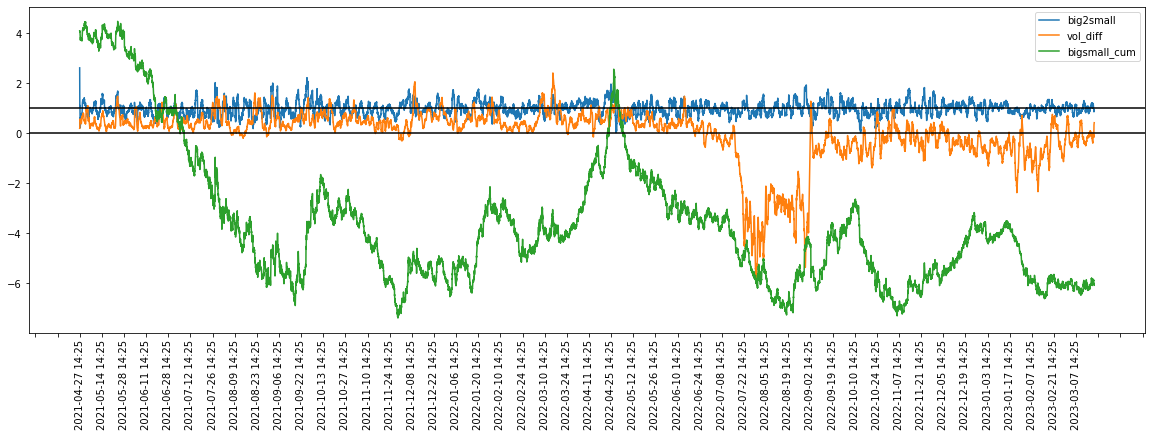

In [126]:
plt.rcParams["figure.figsize"] = (20,6)
df22 = df[1000:]
import matplotlib.ticker as ticker
fig, ax = plt.subplots(1,1)

ax.plot(df22["datetime"], df22["big_small"].rolling(48, min_periods=1).mean() * 1000 + 1, label=2) 
ax.plot(df22["datetime"], (df22["big_vol_m"] - df22["small_vol_m"]).rolling(48, min_periods=1).mean(), label=2)
# ax.plot(df22["datetime"], df22["small_vol_m"].rolling(12, min_periods=1).mean(), label=2)
ax.plot(df22["datetime"], df22["big_cum"] * 30 - df22["small_cum"] * 30 + 5 ,  label=1)
# 
# ax.plot(df22["datetime"], df22["big_close"]  , label=1)


ax.axhline(0, color="black")
ax.axhline(1, color="black")
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=480))
ax.legend(["big2small", "vol_diff", "bigsmall_cum"])
plt.xticks(rotation=90)
plt.show()


In [82]:
df22

,date,big_close,big_vol_m,small_close,small_vol_m,big_amp,small_amp,big_cum,small_cum,big_small,big+small,big2small,datetime
